## <u>Name </u> : Maliha Sanjana
## <u>Mail ID </u> : sanjana_41210200009@nub.ac.bd
## <u>Forage BCG Data Science Task 3 </u> : Feature Engineering and Modelling

## 1. Importing the necessary dependencies

In [79]:
# Install lazypredict
!pip install lazypredict

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from lazypredict.Supervised import LazyClassifier
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 2. Loading the dataset

In [81]:
df = pd.read_csv('churn_data_modeling.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [82]:
df.head(8)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  764c75f661154dac3a6c254cd082ea7d   
2           2  bba03439a292a1e166f80264c16191cb   
3           3  7ab4bf4878d8f7661dfc20e9b8e18011   
4           4  01495c955be7ec5e7f3203406785aae0   
5           5  f53a254b1115634330c12c7fdbf7958a   
6           6  d5e512dbc8118a830a7b8c7f61d89992   
7           7  6ee77a019251bcc304c88167e0dfcb4c   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
2  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
3  foosdfpfkusacimwkcsosbicdxkicaua     45097             0                0   
4  foosdfpfkusacimwkcsosbicdxkicaua     29552             0             1260   
5  usilxuppasemubllopkaafesmlibmsdf      2962             0                0   
6  usilxuppasemubllopkaafesmlibmsdf     10831             0             3112   
7  foosdfpfkusacimwkcsosbicdxkicaua      4442             0             2489   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
2 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
3 2011-12-02 2016-12-02      2011-12-02   2015-12-03  ...   
4 2010-04-21 2016-04-21      2010-04-21   2015-04-22  ...   
5 2011-09-23 2016-09-23      2011-09-23   2015-09-25  ...   
6 2011-07-11 2016-07-11      2011-07-11   2015-07-12  ...   
7 2009-11-26 2016-11-26      2009-11-26   2015-11-27  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                        0.13                    0.09   
1                        0.17                    0.09   
2                        0.15                    0.00   
3                        0.16                    0.08   
4                        0.12                    0.10   
5                        0.15                    0.00   
6                        0.17                    0.09   
7                        0.17                    0.09   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                        0.04                       42.50   
1                        0.00                       44.44   
2                        0.00                       44.44   
3                        0.00                       44.27   
4                        0.07                       40.73   
5                        0.00                       44.44   
6                        0.00                       44.44   
7                        0.00                       45.44   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0                   12.22                        8.15                   42.63   
1                    0.00                        0.00                   44.61   
2                    0.00                        0.00                   44.59   
3                    0.00                        0.00                   44.43   
4                   24.44                       16.29                   40.85   
5                    0.00                        0.00                   44.59   
6                    0.00                        0.00                   44.61   
7                    0.00                        0.00                   45.61   

  mean_3m_price_peak  mean_3m_price_med_peak  churn  
0              12.31                    8.18      1  
1               0.09                    0.00      0  
2               0.00                    0.00      0  
3               0.08                    0.00      1  
4              24.54                   16.37      0  
5               0.00                    0.00      0  
6               0.09                    0.00      0  
7               0.09                    0.00  

In [83]:
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12521 entries, 0 to 12520
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              12521 non-null  object        
 1   channel_sales                   12521 non-null  object        
 2   cons_12m                        12521 non-null  int64         
 3   cons_gas_12m                    12521 non-null  int64         
 4   cons_last_month                 12521 non-null  int64         
 5   date_activ                      12521 non-null  datetime64[ns]
 6   date_end                        12521 non-null  datetime64[ns]
 7   date_modif_prod                 12521 non-null  datetime64[ns]
 8   date_renewal                    12521 non-null  datetime64[ns]
 9   forecast_cons_12m               12521 non-null  float64       
 10  forecast_cons_year              12521 non-null  int64         
 11  fo

In [85]:
df.describe()

cons_12m  cons_gas_12m  cons_last_month  \
count   12521.00      12521.00         12521.00   
mean   158072.74      27830.71         15983.12   
min         0.00          0.00             0.00   
25%      5792.00          0.00             0.00   
50%     14356.00          0.00           811.00   
75%     41119.00          0.00          3433.00   
max   6207104.00    4154590.00        771203.00   
std    567837.83     163360.13         64280.90   

                          date_activ                       date_end  \
count                          12521                          12521   
mean   2011-02-17 20:51:57.834038784  2016-07-27 03:12:31.281846528   
min              2003-05-09 00:00:00            2016-01-28 00:00:00   
25%              2010-02-01 00:00:00            2016-04-27 00:00:00   
50%              2011-05-17 00:00:00            2016-07-28 00:00:00   
75%              2012-05-03 00:00:00            2016-10-30 00:00:00   
max              2014-09-01 00:00:00            2017-06-13 00:00:00   
std                              NaN                            NaN   

                     date_modif_prod                   date_renewal  \
count                          12521                          12521   
mean   2013-01-19 05:39:16.201581312  2015-07-20 23:05:15.406117632   
min              2003-05-09 00:00:00            2013-06-26 00:00:00   
25%              2010-10-07 00:00:00            2015-04-17 00:00:00   
50%              2013-08-22 00:00:00            2015-07-23 00:00:00   
75%              2015-06-16 00:00:00            2015-10-29 00:00:00   
max              2016-01-29 00:00:00            2016-01-28 00:00:00   
std                              NaN                            NaN   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  ...  \
count           12521.00            12521.00                  12521.00  ...   
mean             1879.90             1403.40                      0.97  ...   
min                 0.00                0.00                      0.00  ...   
25%               506.30                0.00                      0.00  ...   
50%              1129.85              331.00                      0.00  ...   
75%              2435.43             1762.00                      0.00  ...   
max             82902.83           175375.00                     30.00  ...   
std              2346.92             3209.11                      5.12  ...   

       mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
count                    12521.00                12521.00   
mean                         0.14                    0.05   
min                          0.00                    0.00   
25%                          0.12                    0.00   
50%                          0.14                    0.08   
75%                          0.15                    0.10   
max                          0.28                    0.20   
std                          0.02                    0.05   

       mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
count                    12521.00                    12521.00   
mean                         0.03                       43.04   
min                          0.00                        0.00   
25%                          0.00                       40.73   
50%                          0.00                       44.36   
75%                          0.07                       44.44   
max                          0.10                       59.44   
std                          0.04                        4.63   

       mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  \
count                12521.00                    12521.00   
mean                     9.53                        6.16   
min                      0.00                        0.00   
25%                      0.00                        0.00   
50%                      0.00                        0.00   
75%                     24.44                       16

## 3. Feature Engineering

#### A. Difference between off-peak prices in December and preceding January

In [86]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01                0.15   
1  038af19179925da21a25619c5a24b745 2015-02-01                0.15   
2  038af19179925da21a25619c5a24b745 2015-03-01                0.15   
3  038af19179925da21a25619c5a24b745 2015-04-01                0.15   
4  038af19179925da21a25619c5a24b745 2015-05-01                0.15   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0            0.00                0.00               44.27            0.00   
1            0.00                0.00               44.27            0.00   
2            0.00                0.00               44.27            0.00   
3            0.00                0.00               44.27            0.00   
4            0.00                0.00               44.27            0.00   

   price_mid_peak_fix  
0                0.00  
1                0.00  
2                0.00  
3                0.00  
4                0.00

In [87]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                            -0.01   
1  0004351ebdd665e6ee664792efc4fd13                            -0.00   
2  0010bcc39e42b3c2131ed2ce55246e3c                             0.05   
3  0010ee3855fdea87602a5b7aba8e42de                            -0.01   
4  00114d74e963e47177db89bc70108537                            -0.00   

   offpeak_diff_dec_january_power  
0                            0.16  
1                            0.18  
2                            1.50  
3                            0.16  
4                           -0.00

#### B. Merging both the datasets

In [88]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   
4  01495c955be7ec5e7f3203406785aae0  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   
3     45097             0                0 2011-12-02 2016-12-02   
4     29552             0             1260 2010-04-21 2016-04-21   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2010-04-16   2015-04-17              47.96  ...   
2      2010-03-30   2015-03-31             240.04  ...   
3      2011-12-02   2015-12-03            8069.28  ...   
4      2010-04-21   2015-04-22             864.73  ...   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                        0.04                       42.50   
1                        0.00                       44.44   
2                        0.00                       44.44   
3                        0.00                       44.27   
4                        0.07                       40.73   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0                   12.22                        8.15                   42.63   
1                    0.00                        0.00                   44.61   
2                    0.00                        0.00                   44.59   
3                    0.00                        0.00                   44.43   
4                   24.44                       16.29                   40.85   

   mean_3m_price_peak mean_3m_price_med_peak  churn  \
0               12.31                   8.18      1   
1                0.09                   0.00      0   
2                0.00                   0.00      0   
3                0.08                   0.00      1   
4               24.54                  16.37      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                             0.02                            3.70  
1                            -0.00                            0.18  
2                            -0.00                            0.18  
3                            -0.00                            0.00  
4                            -0.01                            0.16  

[5 rows x 58 columns]

#### C. Aggregate average prices per period by company and Calculate the mean difference between consecutive periods

In [89]:
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [90]:
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [91]:
columns = [
    'id',
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   
4  01495c955be7ec5e7f3203406785aae0  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   
3     45097             0                0 2011-12-02 2016-12-02   
4     29552             0             1260 2010-04-21 2016-04-21   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2010-04-16   2015-04-17              47.96  ...   
2      2010-03-30   2015-03-31             240.04  ...   
3      2011-12-02   2015-12-03            8069.28  ...   
4      2010-04-21   2015-04-22             864.73  ...   

   mean_3m_price_med_peak  churn  offpeak_diff_dec_january_energy  \
0                    8.18      1                             0.02   
1                    0.00      0                            -0.00   
2                    0.00      0                            -0.00   
3                    0.00      1                            -0.00   
4                   16.37      0                            -0.01   

   offpeak_diff_dec_january_power  off_peak_peak_var_mean_diff  \
0                            3.70                         0.02   
1                            0.18                         0.08   
2                            0.18                         0.15   
3                            0.00                         0.08   
4                            0.16                         0.02   

   peak_mid_peak_var_mean_diff off_peak_mid_peak_var_mean_diff  \
0                         0.03                            0.06   
1                         0.09                            0.17   
2                         0.00                            0.15   
3                         0.08                            0.17   
4                         0.03                            0.05   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                        18.59                         7.45   
1                        44.39                         0.00   
2                        44.40                         0.00   
3                        44.27                         0.00   
4                        16.27                         8.13   

   off_peak_mid_peak_fix_mean_diff  
0                            26.04  
1                            44.39  
2                            44.40  
3                            44.27  
4                            24.40  

[5 rows x 64 columns]

#### D.  Aggregate average prices per period by company and Calculate the mean difference between consecutive periods(months)

In [92]:
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [93]:
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

#### E. Calculate the maximum monthly difference across time periods

In [94]:
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [95]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   
4  01495c955be7ec5e7f3203406785aae0  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   
3     45097             0                0 2011-12-02 2016-12-02   
4     29552             0             1260 2010-04-21 2016-04-21   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2010-04-16   2015-04-17              47.96  ...   
2      2010-03-30   2015-03-31             240.04  ...   
3      2011-12-02   2015-12-03            8069.28  ...   
4      2010-04-21   2015-04-22             864.73  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                             0.06                        18.59   
1                             0.17                        44.39   
2                             0.15                        44.40   
3                             0.17                        44.27   
4                             0.05                        16.27   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                         7.45                            26.04   
1                         0.00                            44.39   
2                         0.00                            44.40   
3                         0.00                            44.27   
4                         8.13                            24.40   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                                0.06                                0.09   
1                                0.08                                0.09   
2                                0.15                                0.00   
3                                0.08                                0.09   
4                                0.02                                0.03   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                   0.15                               44.27   
1                                   0.17                               44.44   
2                                   0.15                               44.44   
3                                   0.17                               44.27   
4                                   0.05                               16.29   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                                8.15                                   44.27  
1                                0.00                                   44.44  
2                                0.00                                   44.44  
3                                0.00                                   44.27  
4                                8.15                                   24.44  

[5 rows x 70 columns]

## 4. Tenure
#### How long a company has been a client of PowerCo.

In [97]:
# Calculate the difference in days and convert to years
df['tenure'] = ((df['date_end'] - df['date_activ']).dt.days / 365.25).astype(int)

# Group by tenure and calculate the mean churn
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure       
3        0.15
2        0.15
4        0.13
13       0.11
12       0.09
6        0.08
5        0.08
7        0.07
11       0.07
8        0.06
10       0.02
9        0.01

#### Companies who have been client only for four month or less than four month are much more likely to churn compared to other clients

### 5. Transforming Dates into Months

In [99]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    # Convert both dates to monthly periods
    ref_period = pd.Period(reference_date, freq='M')
    col_periods = pd.to_datetime(df[column]).dt.to_period('M')

    # Calculate the difference in months
    months = (ref_period - col_periods).apply(lambda x: x.n)
    return months.astype(int)

In [100]:
#This approach manually calculates the difference in months by considering the year and month components of the dates.

def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    # Extract year and month from reference date
    ref_year = reference_date.year
    ref_month = reference_date.month

    # Extract year and month from the column
    col_years = pd.to_datetime(df[column]).dt.year
    col_months = pd.to_datetime(df[column]).dt.month

    # Calculate the difference in months
    months = (ref_year - col_years) * 12 + (ref_month - col_months)
    return months.astype(int)

In [101]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [102]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   
4  01495c955be7ec5e7f3203406785aae0  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1       544             0                0              47.96   
2      1584             0                0             240.04   
3     45097             0                0            8069.28   
4     29552             0             1260             864.73   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                      0.00                     1.78   
1                   0                      0.00                    38.72   
2                   0                      0.00                    19.83   
3                   0                      0.00                     0.00   
4                 751                      0.00                   144.49   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                            0.11  ...                                0.09   
1                            0.17  ...                                0.09   
2                            0.15  ...                                0.00   
3                            0.17  ...                                0.09   
4                            0.12  ...                                0.03   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                    0.15                              44.27   
1                                    0.17                              44.44   
2                                    0.15                              44.44   
3                                    0.17                              44.27   
4                                    0.05                              16.29   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                                8.15                                   44.27   
1                                0.00                                   44.44   
2                                0.00                                   44.44   
3                                0.00                                   44.27   
4                                8.15                                   24.44   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            31              5                  2              7  
1       6            69              3                 69              9  
2       6            70              2                 70             10  
3       5            49             11                 49              1  
4       6            69              3                 69              9  

[5 rows x 71 columns]

### 6. Transforming the Boolean Data

In [103]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas       
0         0.10
1         0.09

#### Customers who bought multiple products from company are sure clients and are loyal towards company whose churn % are low

## 7. Transforming Categorical Data

In [104]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    5877
MISSING                             3039
lmkebamcaaclubfxadlmueccxoimlema    1569
usilxuppasemubllopkaafesmlibmsdf    1228
ewpakwlliwisiwduibdlfmalxowmwpci     792
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [105]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  764c75f661154dac3a6c254cd082ea7d       544             0                0   
2  bba03439a292a1e166f80264c16191cb      1584             0                0   
3  7ab4bf4878d8f7661dfc20e9b8e18011     45097             0                0   
4  01495c955be7ec5e7f3203406785aae0     29552             0             1260   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                      0.00   
1              47.96                   0                      0.00   
2             240.04                   0                      0.00   
3            8069.28                   0                      0.00   
4             864.73                 751                      0.00   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                            0.11   
1                    38.72                            0.17   
2                    19.83                            0.15   
3                     0.00                            0.17   
4                   144.49                            0.12   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                        0.10  ...       3            31              5   
1                        0.09  ...       6            69              3   
2                        0.00  ...       6            70              2   
3                        0.09  ...       5            49             11   
4                        0.10  ...       6            69              3   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               7            False   
1                 69               9            False   
2                 70              10            False   
3                 49               1            False   
4                 69               9            False   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                     False   
3                                      True   
4                                      True   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                     True   
3                                    False   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 75 columns]

In [106]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    6271
kamkkxfxxuwbdslkwifmmcsiusiuosws    3571
ldkssxwpmemidmecebumciepifcamkci    2622
MISSING                               56
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [107]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  764c75f661154dac3a6c254cd082ea7d       544             0                0   
2  bba03439a292a1e166f80264c16191cb      1584             0                0   
3  7ab4bf4878d8f7661dfc20e9b8e18011     45097             0                0   
4  01495c955be7ec5e7f3203406785aae0     29552             0             1260   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                      0.00   
1              47.96                   0                      0.00   
2             240.04                   0                      0.00   
3            8069.28                   0                      0.00   
4             864.73                 751                      0.00   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                            0.11   
1                    38.72                            0.17   
2                    19.83                            0.15   
3                     0.00                            0.17   
4                   144.49                            0.12   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                        0.10  ...                  2               7   
1                        0.09  ...                 69               9   
2                        0.00  ...                 70              10   
3                        0.09  ...                 49               1   
4                        0.10  ...                 69               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1            False                                     False   
2            False                                     False   
3            False                                     False   
4            False                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                     False   
3                                      True   
4                                      True   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

  origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                       True  
1                                      False  
2                                      False  
3                                       True  
4                                       True  

[5 rows x 77 columns]

## 8. Transforming Numerical Data

In [108]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count   12521.00      12521.00         12521.00           12521.00   
mean   158072.74      27830.71         15983.12            1879.90   
std    567837.83     163360.13         64280.90            2346.92   
min         0.00          0.00             0.00               0.00   
25%      5792.00          0.00             0.00             506.30   
50%     14356.00          0.00           811.00            1129.85   
75%     41119.00          0.00          3433.00            2435.43   
max   6207104.00    4154590.00        771203.00           82902.83   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count            12521.00                  12521.00                 12521.00   
mean              1403.40                      0.97                    63.27   
std               3209.11                      5.12                    66.04   
min                  0.00                      0.00                     0.00   
25%                  0.00                      0.00                    16.19   
50%                331.00                      0.00                    18.88   
75%               1762.00                      0.00                   131.02   
max             175375.00                     30.00                   599.31   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                        12521.00                    12521.00   
mean                             0.14                        0.05   
std                              0.02                        0.05   
min                              0.00                        0.00   
25%                              0.12                        0.00   
50%                              0.14                        0.08   
75%                              0.15                        0.10   
max                              0.27                        0.20   

       forecast_price_pow_off_peak  
count                     12521.00  
mean                         43.11  
std                           4.44  
min                           0.00  
25%                          40.61  
50%                          44.31  
75%                          44.31  
max                          59.27

### A. Applying log10 transformation

In [109]:
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [110]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  12521.00      12521.00         12521.00           12521.00   
mean       4.23          0.79             2.28               2.97   
std        0.88          1.72             1.76               0.68   
min        0.00          0.00             0.00               0.00   
25%        3.76          0.00             0.00               2.71   
50%        4.16          0.00             2.91               3.05   
75%        4.61          0.00             3.54               3.39   
max        6.79          6.62             5.89               4.92   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count            12521.00                  12521.00                 12521.00   
mean                 1.80                      0.97                     1.52   
std                  1.58                      5.12                     0.57   
min                  0.00                      0.00                     0.00   
25%                  0.00                      0.00                     1.24   
50%                  2.52                      0.00                     1.30   
75%                  3.25                      0.00                     2.12   
max                  5.24                     30.00                     2.78   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                        12521.00                    12521.00   
mean                             0.14                        0.05   
std                              0.02                        0.05   
min                              0.00                        0.00   
25%                              0.12                        0.00   
50%                              0.14                        0.08   
75%                              0.15                        0.10   
max                              0.27                        0.20   

       forecast_price_pow_off_peak  
count                     12521.00  
mean                         43.11  
std                           4.44  
min                           0.00  
25%                          40.61  
50%                          44.31  
75%                          44.31  
max                          59.27

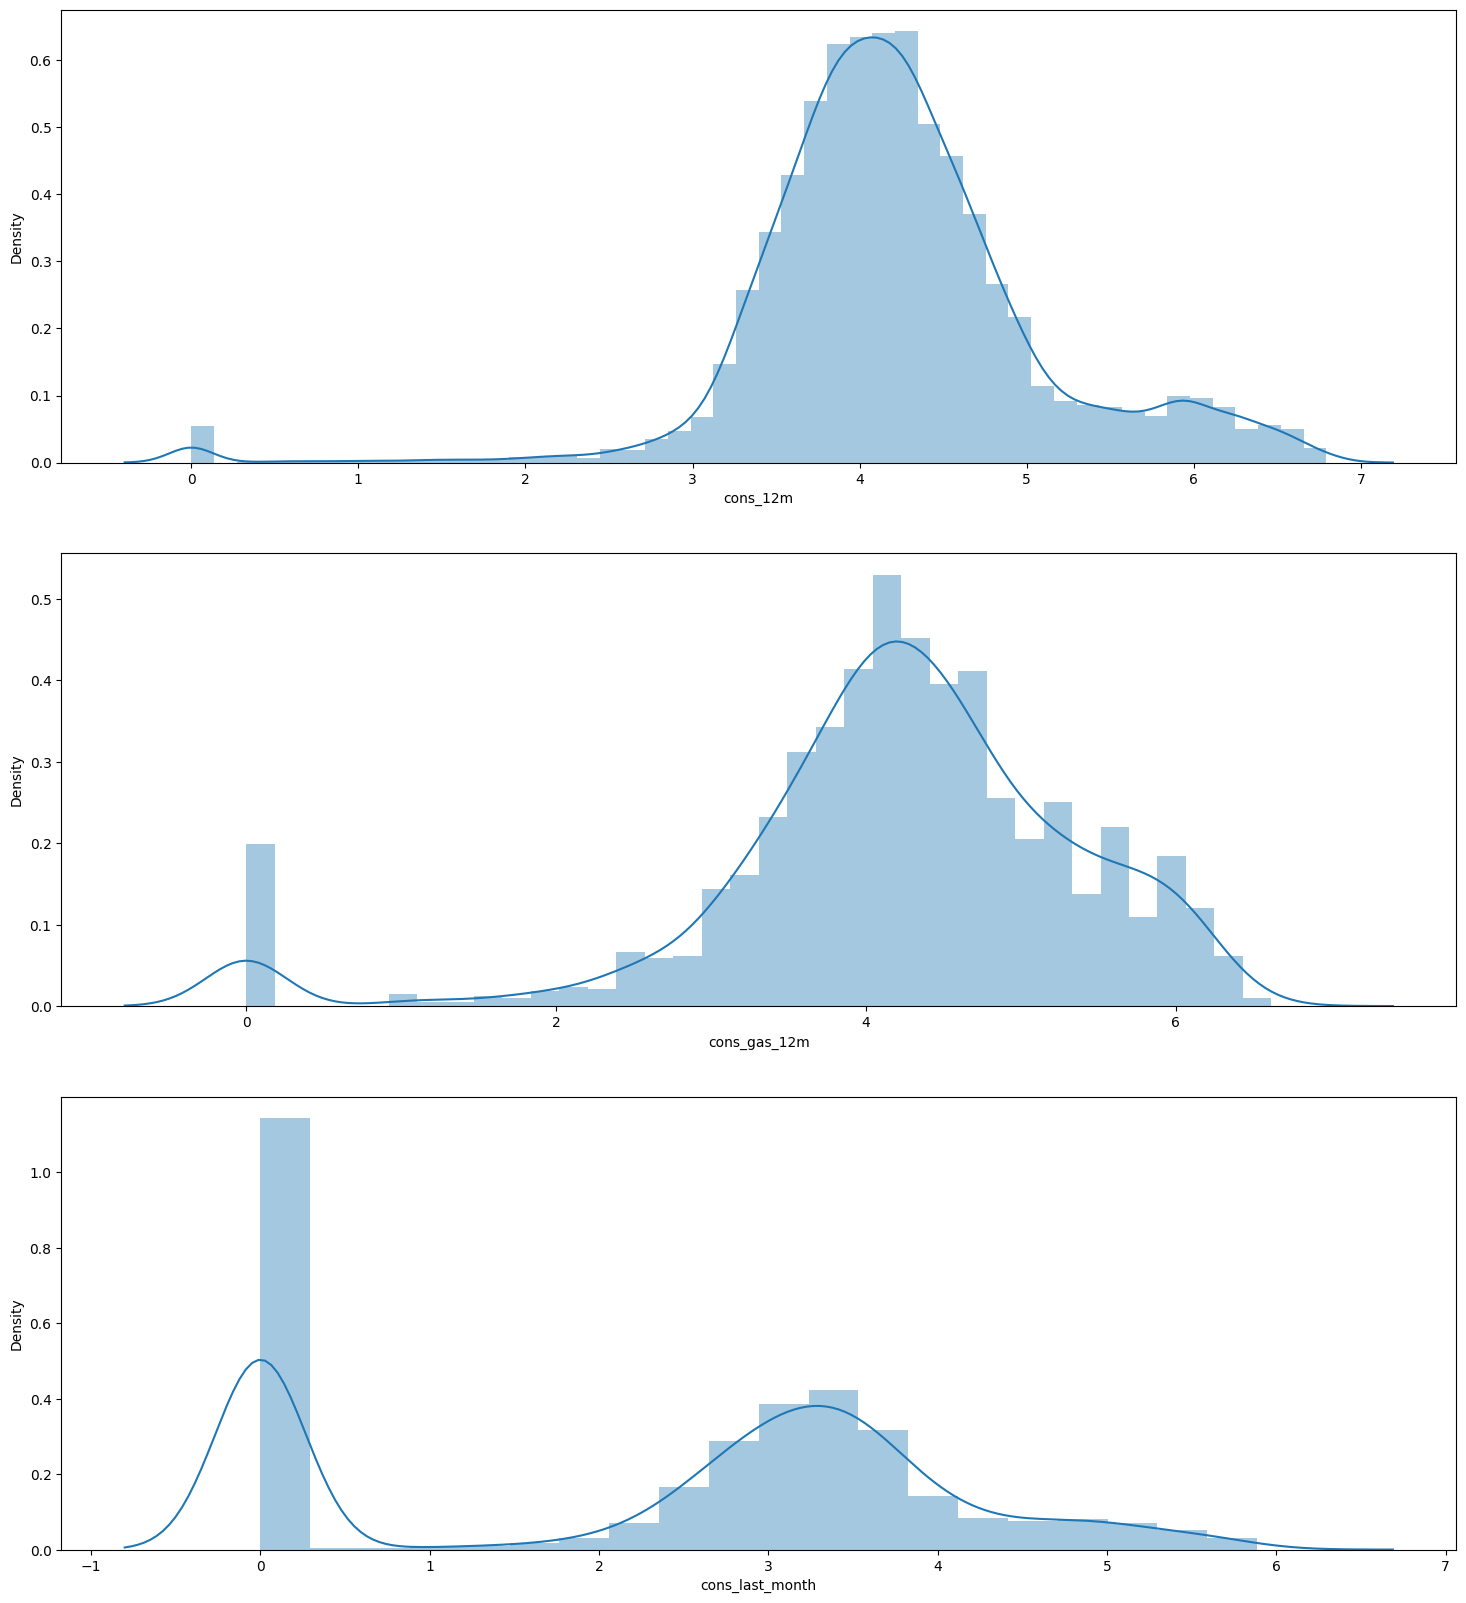

In [111]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

## 9. Correlation

1. **Importance of Linear Relationships:** Understanding the linear relationships between features is crucial for predictive modeling, particularly in the context of predicting churn.

2. **Correlation with Churn:** The goal is to identify features that correlate with churn, indicating their potential as predictors for the target variable. High correlation suggests that these features may be informative for predicting customer churn.

3. **Caution with High Correlation:** However, a very high correlation between features might raise suspicion. High correlation implies that these features share similar information, which can be problematic for predictive models.

4. **Independence Assumption:** Parametric predictive models assume feature independence. If two features are highly correlated, it violates the assumption that each feature should be independent of others. This is a key consideration for building reliable predictive models.

5. **Ideal Scenario:** Ideally, the desired set of features should exhibit zero correlation with independent variables (all features except the target variable) and high correlation with the target variable (churn). Achieving this ideal scenario is rare, and there's often a small degree of correlation among independent features.

6. **Balancing Act:** The challenge lies in striking a balance between having features that contribute independently to the model while ensuring they are still informative for predicting the target variable, in this case, customer churn. Managing correlations appropriately is essential for building robust and accurate predictive models.

In [112]:
# Drop the non-numeric 'id' column before calculating correlation
# Use errors='ignore' to avoid KeyError if 'id' column is already dropped
df.drop(columns="id", axis=1, inplace=True, errors='ignore')

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Now calculate the correlation using only the numeric columns
corr = numeric_df.corr()

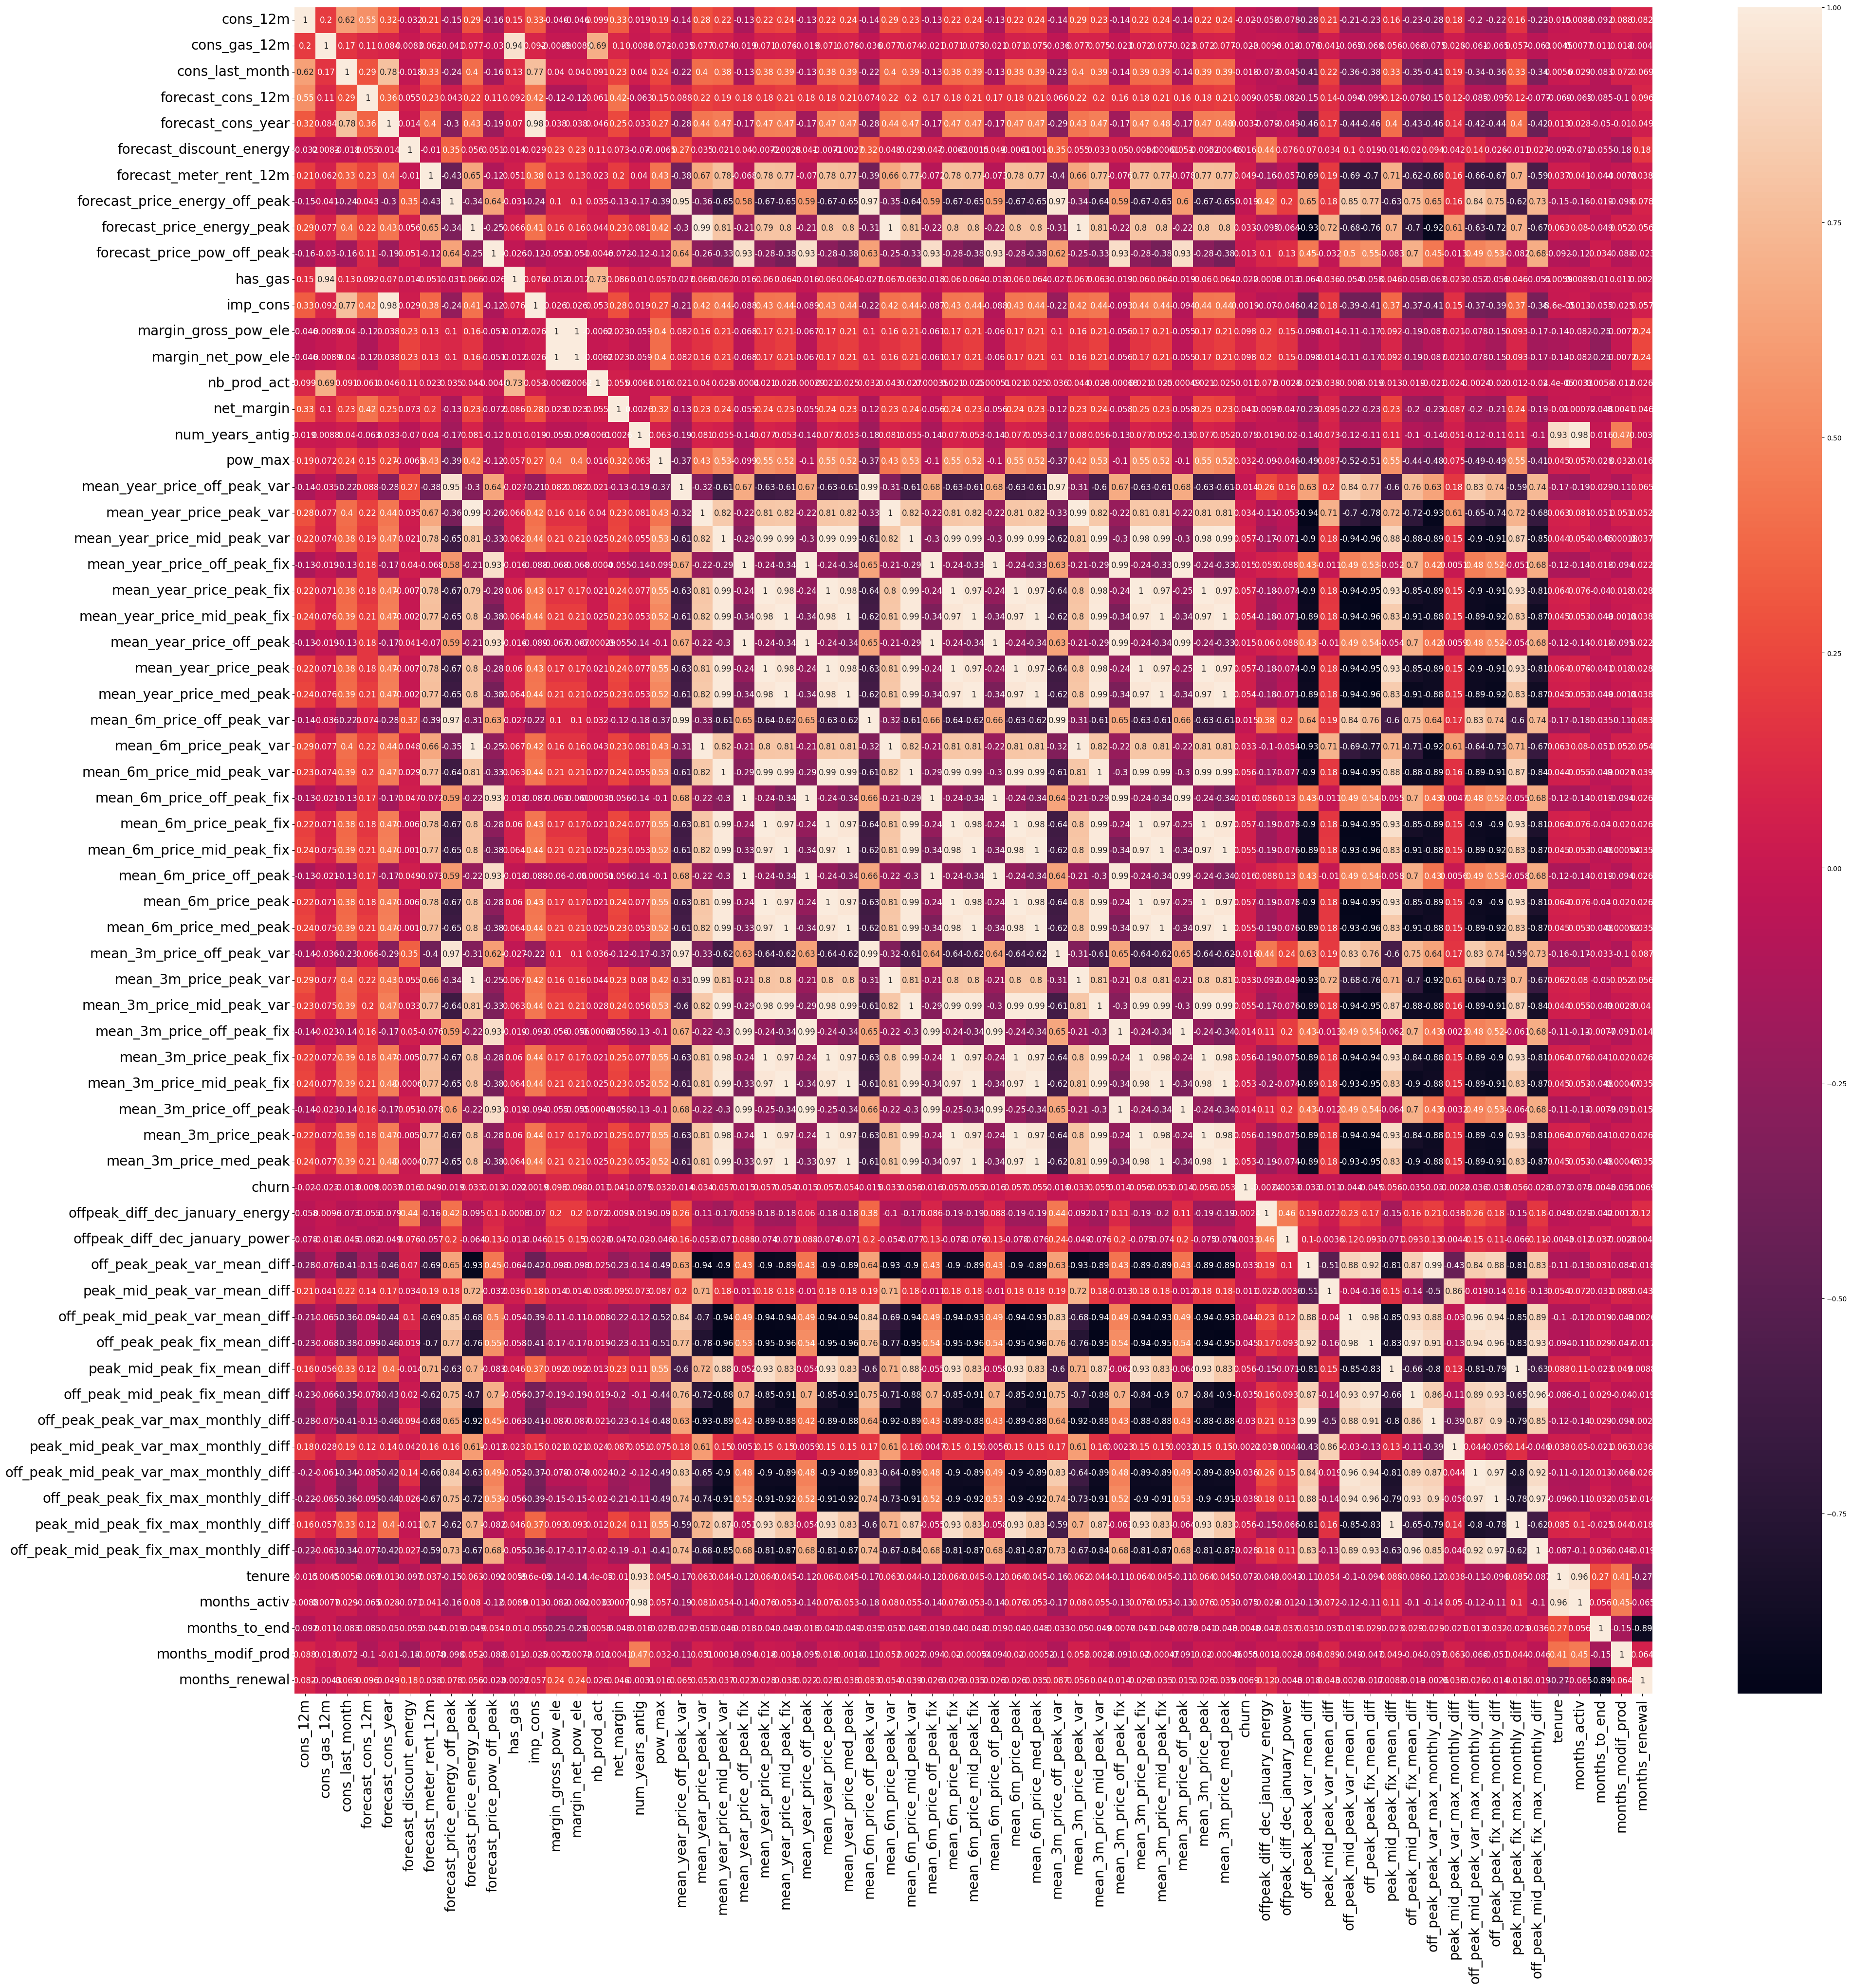

In [113]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [114]:
fig = px.imshow(corr, aspect="auto")
fig.update_layout(width=1000, height=1000)
fig.show()

#### Removing two variables which exhibit a high correlation with other independent features.

In [115]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0      0.00          4.74             0.00               0.00   
1      2.74          0.00             0.00               1.69   
2      3.20          0.00             0.00               2.38   
3      4.65          0.00             0.00               3.91   
4      4.47          0.00             3.10               2.94   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                      0.00                     0.44   
1                      0.00                     1.60   
2                      0.00                     1.32   
3                      0.00                     0.00   
4                      0.00                     2.16   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                            0.11                        0.10   
1                            0.17                        0.09   
2                            0.15                        0.00   
3                            0.17                        0.09   
4                            0.12                        0.10   

   forecast_price_pow_off_peak  has_gas  ...  months_modif_prod  \
0                        40.61        1  ...                  2   
1                        44.31        0  ...                 69   
2                        44.31        0  ...                 70   
3                        44.31        0  ...                 49   
4                        40.61        0  ...                 69   

   months_renewal  channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0               7            False                                     False   
1               9            False                                     False   
2              10            False                                     False   
3               1            False                                     False   
4               9            False                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                     False   
3                                      True   
4                                      True   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                        True  
4                                        True  

[5 rows x 74 columns]

## 10. Modelling

### A. Spilting the data into Training and Testing Data using the "train_test_split" function

In [117]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
# Remove inplace=True and assign the result to X
X = df.drop(columns="id", axis=1, errors='ignore')
print(X.shape)
print(y.shape)

(12521, 74)
(12521,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10016, 74)
(10016,)
(2505, 74)
(2505,)


### B. Model Training

In [120]:
# Step 1: Replace 'MISSING' with NaN
X_train = X_train.replace('MISSING', np.nan)

# Step 2: Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Step 3: Apply one-hot encoding
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_features = encoder.fit_transform(X_train[categorical_cols])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded features
X_train = X_train.drop(columns=categorical_cols)
X_train = pd.concat([X_train, encoded_df], axis=1)

# Handle missing values (if any)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train matches X_train's index

# Reset indices to ensure consistency
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Verify shapes
print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)

# Step 4: Train the model
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

Final X_train shape: (7989, 100)
Final y_train shape: (7989,)


RandomForestClassifier(n_estimators=1000)

### C. Model Evaluation

In [122]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Handle 'MISSING' values
X_train = X_train.replace('MISSING', np.nan)
X_test = X_test.replace('MISSING', np.nan)

# Step 2: Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Step 3: Apply one-hot encoding
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Fit and transform X_train
encoded_train_features = encoder.fit_transform(X_train[categorical_cols])
encoded_train_df = pd.DataFrame(encoded_train_features.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Transform X_test using the same encoder
encoded_test_features = encoder.transform(X_test[categorical_cols])
encoded_test_df = pd.DataFrame(encoded_test_features.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded features
X_train = X_train.drop(columns=categorical_cols)
X_train = pd.concat([X_train, encoded_train_df], axis=1)

X_test = X_test.drop(columns=categorical_cols)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

# Step 4: Align feature names
# Add missing features to X_test with default values (e.g., 0)
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Drop extra features in X_test that are not in X_train
extra_cols = [col for col in X_test.columns if col not in X_train.columns]
X_test = X_test[X_train.columns]

# Step 5: Verify shapes and feature names
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)
print("Are feature names aligned?", X_train.columns.equals(X_test.columns))

# Step 6: Make predictions
predictions = model.predict(X_test)

X_train shape: (7989, 100)
X_test shape: (518, 100)
X_train columns: Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'mean_year_price_off_peak_var',
       'mean_year_price_peak_var', 'mean_year_price_mid_peak_var',
       'mean_year_price_off_peak_fix', 'mean_year_price_peak_fix',
       'mean_year_price_mid_peak_fix', 'mean_year_price_off_peak',
       'mean_year_price_peak', 'mean_year_price_med_peak',
       'mean_6m_price_off_peak_var', 'mean_6m_price_peak_var',
       'mean_6m_price_mid_peak_var', 'mean_6m_price_off_peak_fix',
       'mean_6m_price_peak_fix', 'mean_6m_price_mid_peak_fix',
       'mean_6m_price_off_peak', 'mean_6m_price_peak',
       'mean_6m_price_

In [129]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [130]:
y_test.value_counts()

churn
0    451
1     67
Name: count, dtype: int64

In [131]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 67
False positives: 0
True negatives: 451
False negatives: 0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## 11. Modelling using LazyPredict Supervised Learning Models

In [132]:
lazy_classify = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [133]:
models, predictions = lazy_classify.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 764, number of negative: 7225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10940
[LightGBM] [Info] Number of data points in the train set: 7989, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.095631 -> initscore=-2.246735
[LightGBM] [Info] Start training from score -2.246735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [134]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
CalibratedClassifierCV             1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
GaussianNB                         1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
LogisticRegression                 1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
LinearDiscriminantAnalysis         1.00               1.00     1.00      1.00   
LinearSVC                          1.00               1.00     1.00      1.00   
LGBMClassifier              

## 12. Modelling using LGBM Classifier

In [135]:
model_2 = lgb.LGBMClassifier()

In [137]:
import pandas as pd
import re
import lightgbm as lgb

# Function to sanitize column names
def sanitize_column_names(df):
    # Replace special characters with underscores
    df.columns = [re.sub(r'[^a-zA-Z0-9]', '_', col) for col in df.columns]
    return df

# Sanitize column names for both X_train and X_test
X_train = sanitize_column_names(X_train)
X_test = sanitize_column_names(X_test)

# Initialize the model
model_2 = lgb.LGBMClassifier()

# Fit the model
model_2.fit(X_train, y_train)

# Make predictions
y_pred_2 = model_2.predict(X_test)

[LightGBM] [Info] Number of positive: 764, number of negative: 7225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10781
[LightGBM] [Info] Number of data points in the train set: 7989, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.095631 -> initscore=-2.246735
[LightGBM] [Info] Start training from score -2.246735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [138]:
y_pred_2 = model_2.predict(X_test)

In [139]:
print("Accuracy:", accuracy_score(y_test, y_pred_2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_2))
print("Classification Report:\n", classification_report(y_test, y_pred_2))

Accuracy: 1.0
Confusion Matrix:
 [[451   0]
 [  0  67]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00        67

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518



## 13. Model understanding

In [140]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

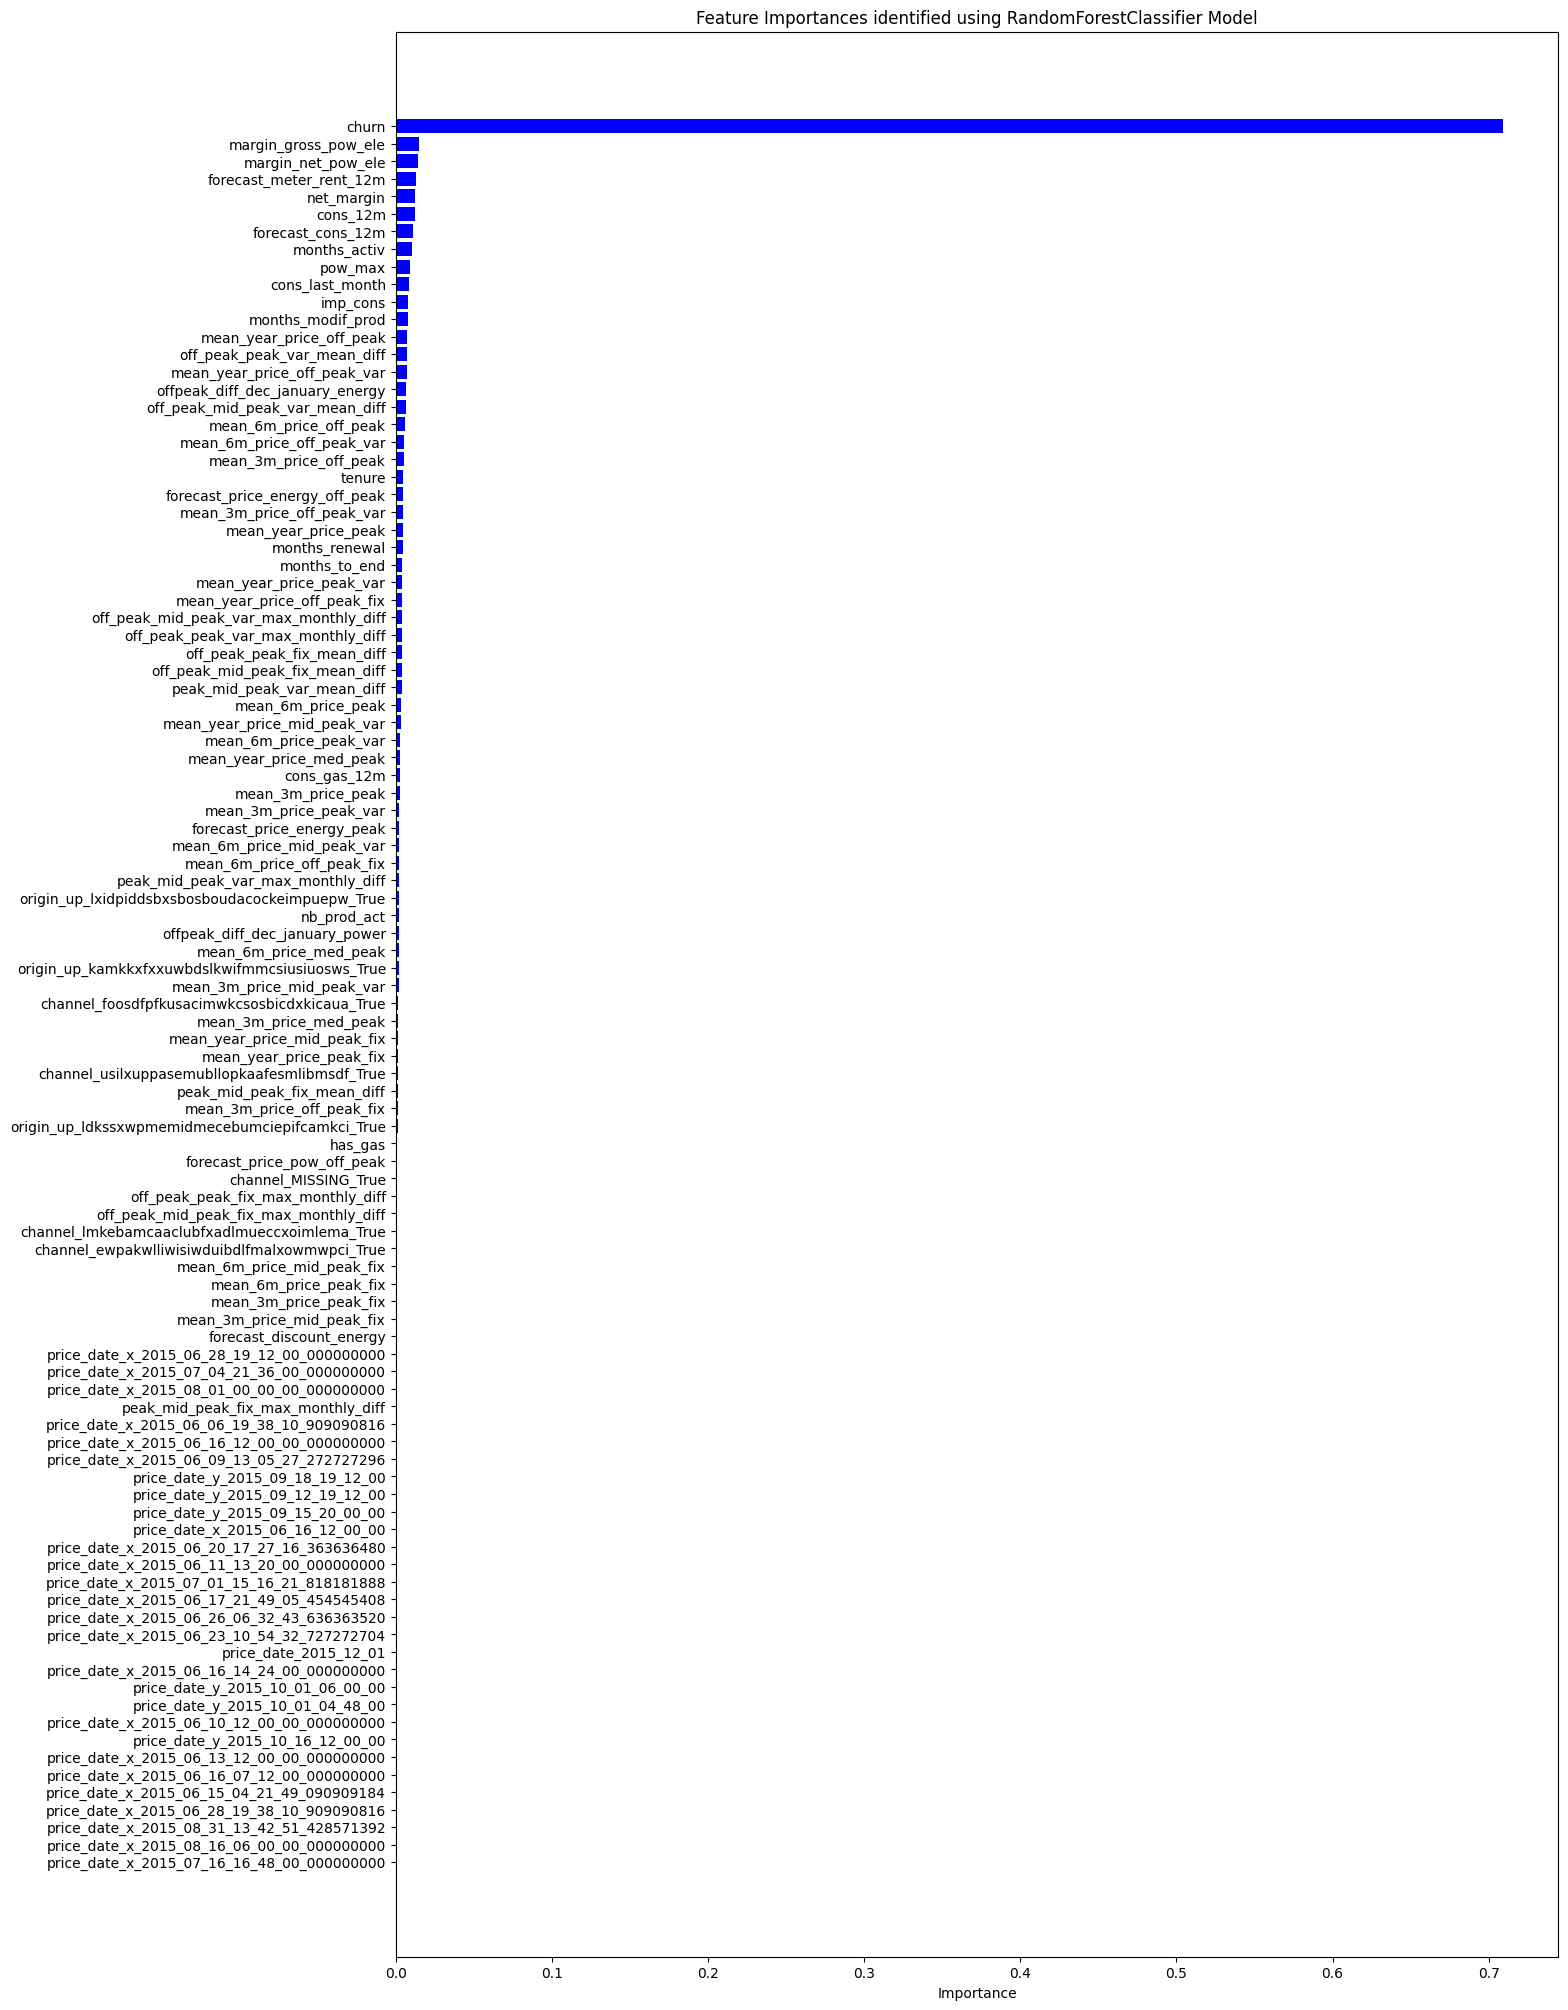

In [141]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances identified using RandomForestClassifier Model')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [142]:
feature_importances_2 = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_2.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

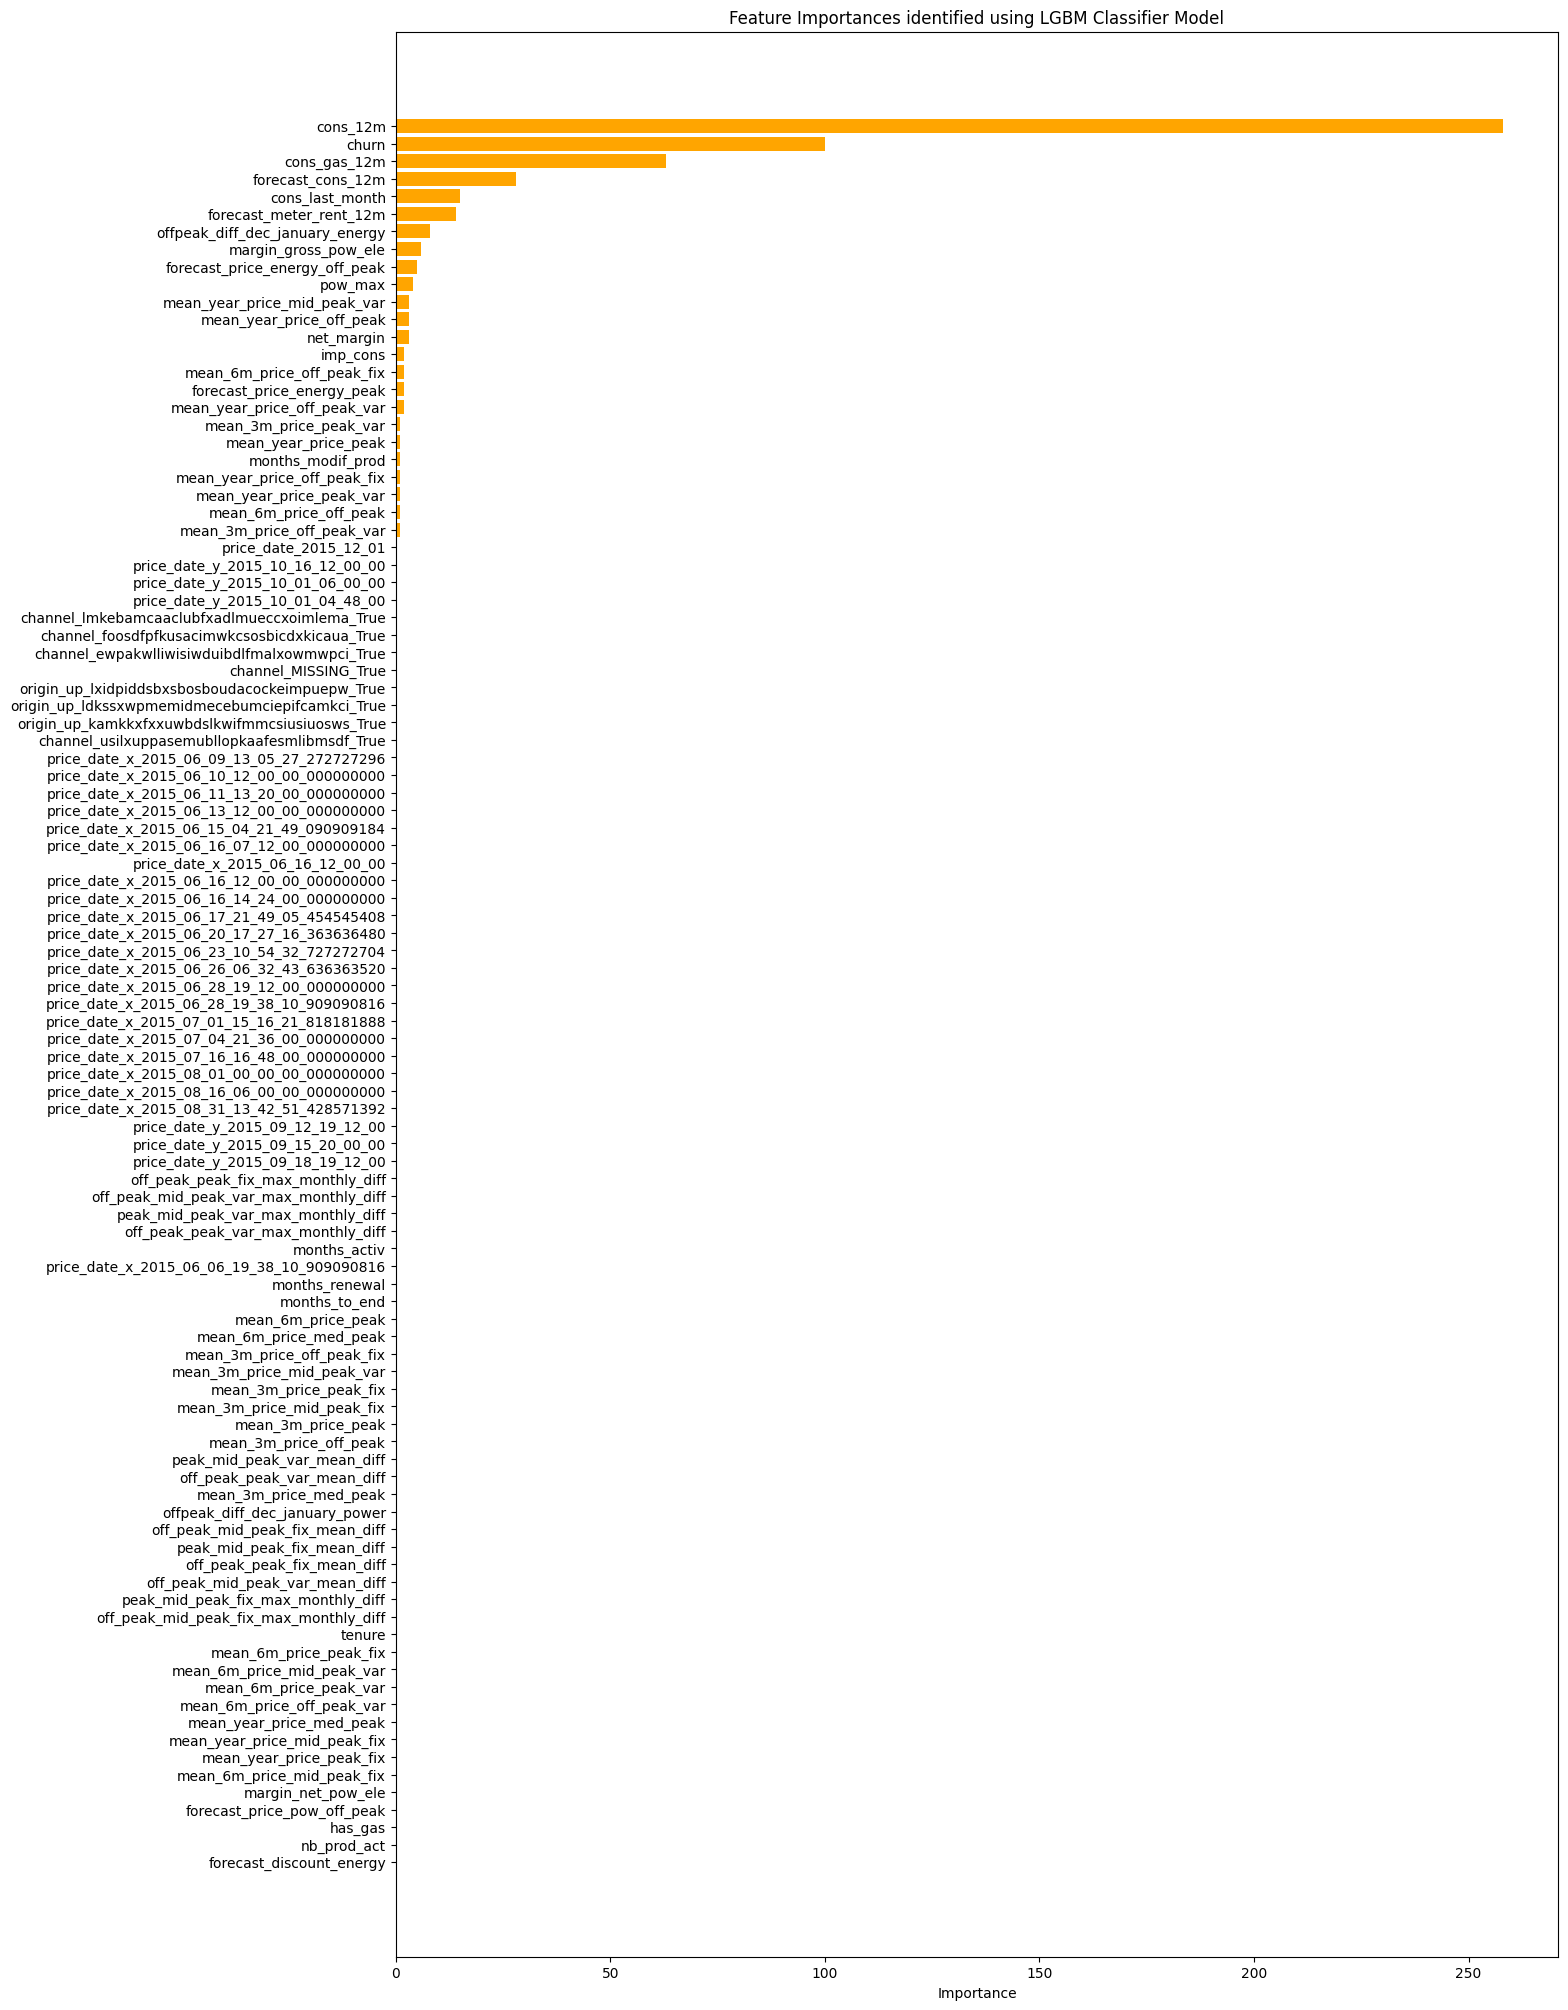

In [143]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances identified using LGBM Classifier Model')
plt.barh(range(len(feature_importances_2)), feature_importances_2['importance'], color='orange', align='center')
plt.yticks(range(len(feature_importances_2)), feature_importances_2['features'])
plt.xlabel('Importance')
plt.show()

## <p style="color:red"> From both the above plots we can infer that the chrun highly depends on the 'cons_12m' parameter. But other parameters must also be considered</p>